In [53]:
import sys
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis')
from spectralindex import prefixes
from astropy.visualization import simple_norm
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector
import astropy.visualization.wcsaxes
from spectral_cube import SpectralCube

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
%matplotlib inline
import pylab as pl

In [56]:
os.chdir('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/February2021Release/')

In [57]:
    prefixes['W43MM1'] = dict(
        finaliter_prefix_b3="W43-MM1/B3/cleanest/W43-MM1_B3_uid___A001_X1296_X1af_continuum_merged_12M_robust0_selfcal4_finaliter",
        finaliter_prefix_b6="W43-MM2/B6/cleanest/W43-MM2_B6_uid___A001_X1296_X113_continuum_merged_12M_robust0_selfcal5_finaliter",)

In [58]:
prefixes.keys()

dict_keys(['G328', 'G333', 'G12', 'W51IRS2', 'G008', 'G327', 'G10', 'G337', 'G338', 'G351', 'G353', 'W43MM3', 'W43MM2', 'W51-E', 'W43MM1'])

In [59]:
def make_zoom(fieldid, zoom_parameters,
              overview_vis_pars={'max_percent':99.5, 'min_percent':0.5, 'stretch':'linear'},
              overview_cmap='gray_r',
              inset_cmap='inferno',
              band='B6',
              main_zoombox=None,
             ):
    
    pfxs = prefixes[fieldid]

    finaliter_prefix = pfxs[f'finaliter_prefix_{band}'.lower()]
    image = SpectralCube.read(f'{finaliter_prefix}.image.tt0.fits', use_dask=False, format='fits').minimal_subcube()

    fig = pl.figure(figsize=(12,12))

    fig = pl.figure(1, figsize=(10,10))
    fig.clf()
    ax = fig.add_subplot(projection=image.wcs.celestial)

    img = image[0].value
    norm = simple_norm(img, **overview_vis_pars)
    ax.imshow(img, cmap=overview_cmap, norm=norm)

    tick_fontsize=16
    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel("RA (J2000)", fontsize=20)
    dec.set_axislabel("Dec (J2000)", fontsize=20, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticks(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticks(exclude_overlapping=True)

    for zp in zoom_parameters:

        xl,xr = zp['xl'], zp['xr']
        yl,yu = zp['yl'], zp['yu']
        slc = [slice(yl,yu), slice(xl,xr)]
        axins = inset_axes(ax, **zp['inset_pars'],
                           axes_class=astropy.visualization.wcsaxes.core.WCSAxes,
                           axes_kwargs=dict(wcs=image[0][slc].wcs.celestial))

        norm2 = simple_norm(img, **zp['vis_pars'])

        axins.imshow(img[slc], extent=[xl,xr,yl,yu], cmap=inset_cmap, norm=norm2)
        mark_inset(parent_axes=ax, inset_axes=axins,
                   fc="none", ec="b", **zp['mark_inset_pars'])
        ra = axins.coords['ra']
        dec = axins.coords['dec']
        axins.set_xticklabels([])
        axins.set_yticklabels([])
        axins.xaxis.set_visible(False)
        axins.yaxis.set_visible(False)
        ra.set_ticks_visible(False)
        dec.set_ticks_visible(False)
        ra.set_axislabel('')
        dec.set_axislabel('')
        ra.ticklabels.set_visible(False)
        dec.ticklabels.set_visible(False)
        
    #print(ax.axis())
    if main_zoombox:
        ax.axis(main_zoombox)

    pl.savefig(f'/orange/adamginsburg/ALMA_IMF/datapaper/figures/{fieldid}_inset_zooms_{band}.png', bbox_inches='tight')
    pl.savefig(f'/orange/adamginsburg/ALMA_IMF/datapaper/figures/{fieldid}_inset_zooms_{band}.pdf', bbox_inches='tight')

In [60]:
zoom_parameters = {}

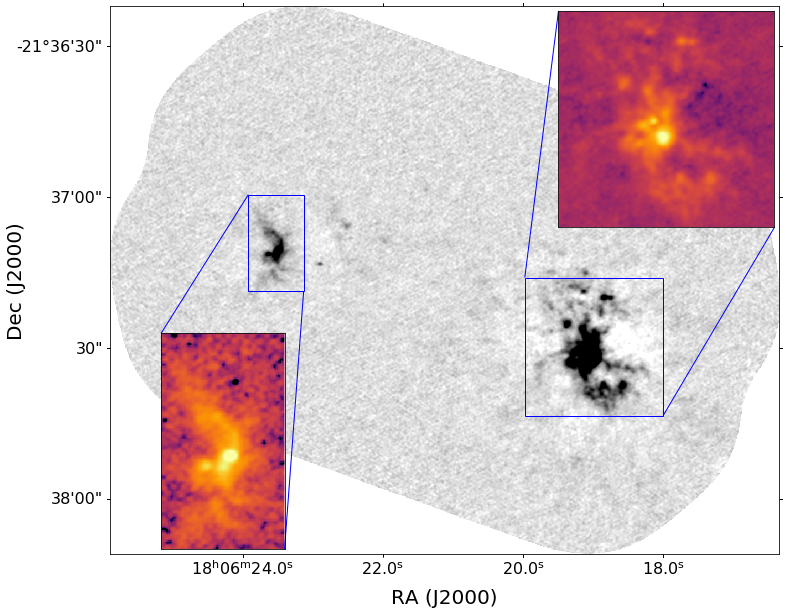

In [61]:
zoom_parameters[('G008', 'B6')] = [{'xl':750, 'xr':1000, 'yl':250, 'yu':500, 
                                    'inset_pars':{'loc': 1, 'width':3, 'height':3,},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.995, 'min_percent': 0, 'stretch':'log'}
                                   },
                                   {'xl':250, 'xr':350, 'yl':475, 'yu':650, 
                                    'inset_pars':{'loc': 3, 'width':3, 'height':3,},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.9, 'min_percent': 2, 'stretch':'log'}
                                   },
                                  ]
make_zoom('G008', zoom_parameters[('G008', 'B6')], band='B6')

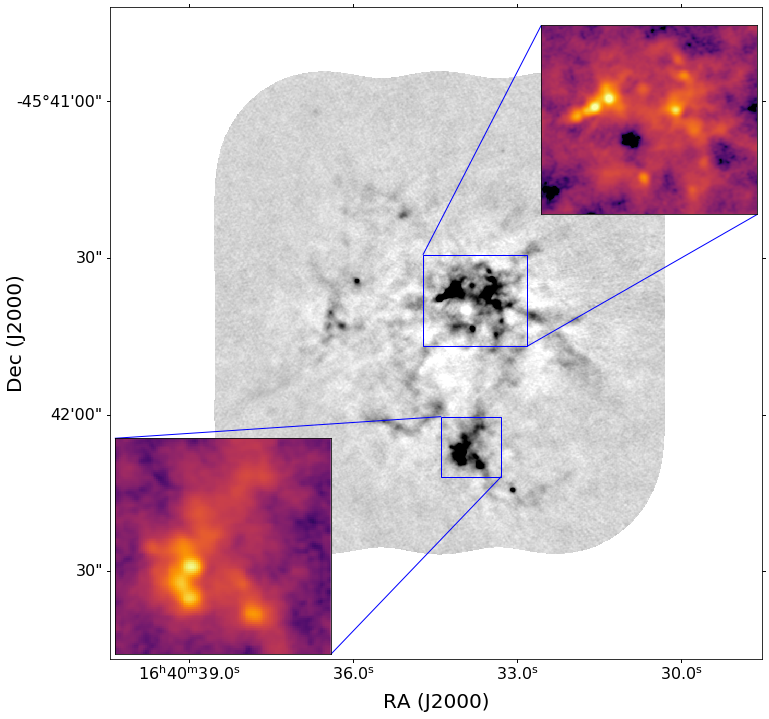

In [62]:
zoom_parameters[('G338', 'B6')] = [{'xl':400, 'xr':600, 'yl':400, 'yu':575, 
                                    'inset_pars':{'loc': 1, 'width':3, 'height':3,},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.995, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   {'xl':435, 'xr':550, 'yl':150, 'yu':265, 
                                    'inset_pars':{'loc': 3, 'width':3, 'height':3,},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.995, 'min_percent': 1, 'stretch':'log'}
                                   },
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom('G338', zoom_parameters[('G338', 'B6')], band='B6', main_zoombox=(-200,1050,-200,1050))

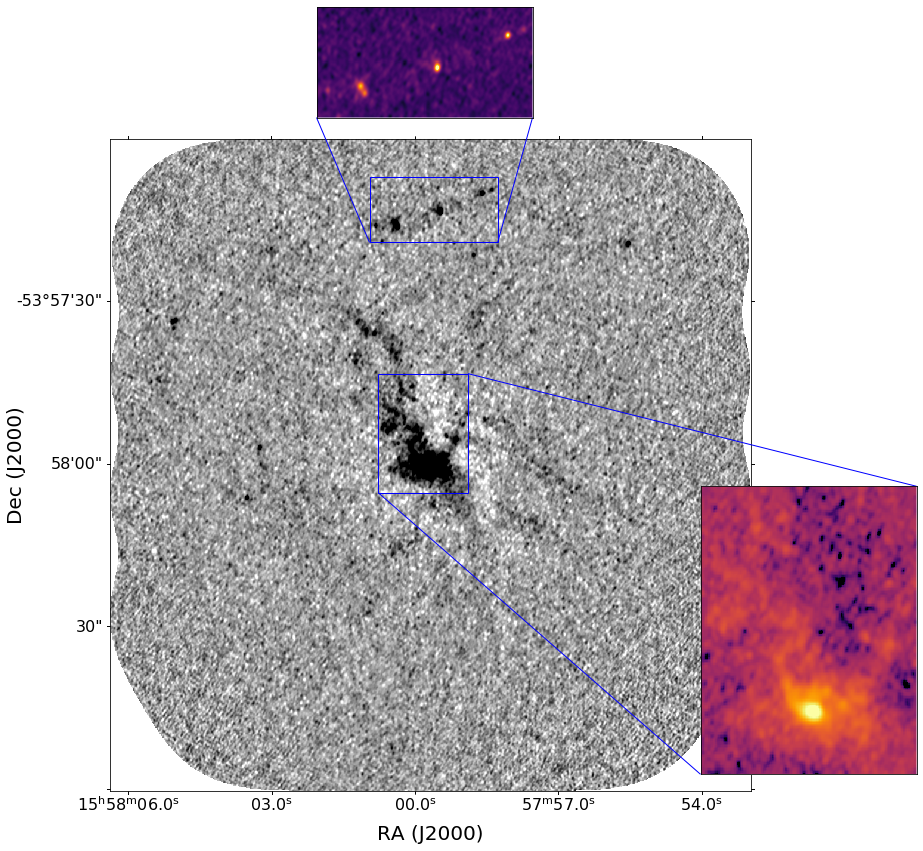

In [63]:
zoom_parameters[('G328', 'B6')] = [{'xl':450, 'xr':600, 'yl':500, 'yu':700, 
                                    'inset_pars':{'loc': 4, 'width':4, 'height':4, 'bbox_to_anchor':(870, 120, 100, 100),},
                                    'mark_inset_pars':{'loc1':1, 'loc2':3,},
                                    'vis_pars':{'max_percent':99.995, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   {'xl':435, 'xr':650, 'yl':920, 'yu':1030, 
                                    'inset_pars':{'loc': 1, 'width':3, 'height':3, 'bbox_to_anchor':(450, 850, 100,100),},
                                    'mark_inset_pars':{'loc1':3, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.95, 'min_percent': 0, 'stretch':'linear'}
                                   },
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom('G328', zoom_parameters[('G328', 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))

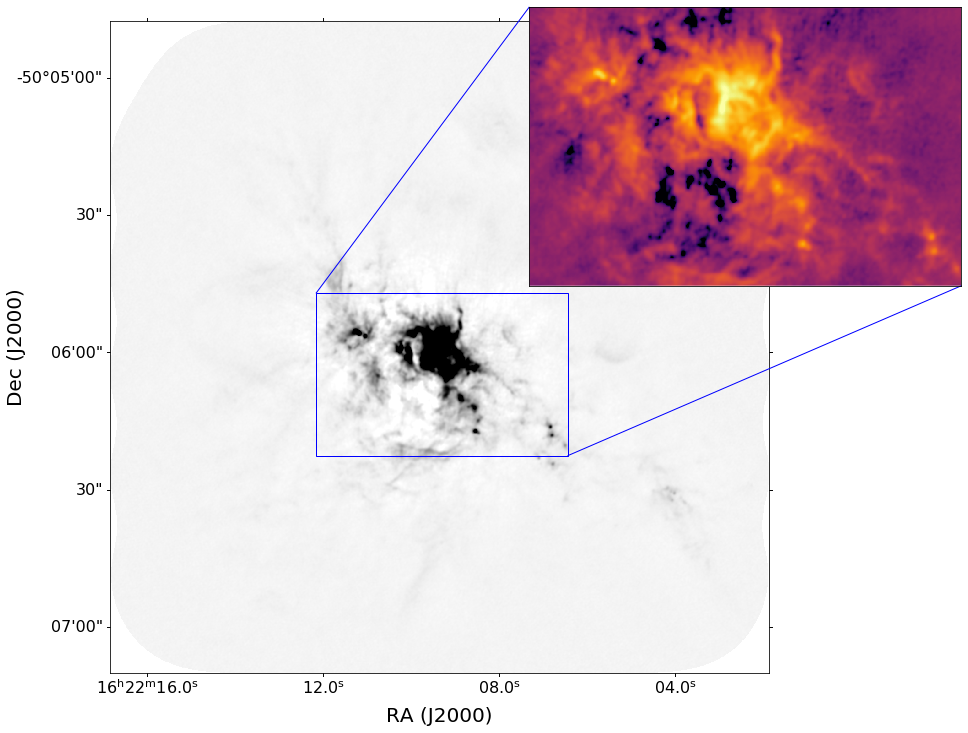

In [64]:
zoom_parameters[('G333', 'B6')] = [{'xl':450, 'xr':1000, 'yl':475, 'yu':830, 
                                    'inset_pars':{'loc': 1, 'width':6, 'height':5, 'bbox_to_anchor':(670, 120, 300, 700),},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.995, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   #{'xl':435, 'xr':650, 'yl':920, 'yu':1030, 
                                   # 'inset_pars':{'loc': 1, 'width':3, 'height':3, 'bbox_to_anchor':(450, 850, 100,100),},
                                   # 'mark_inset_pars':{'loc1':3, 'loc2':4,},
                                   # 'vis_pars':{'max_percent':99.95, 'min_percent': 0, 'stretch':'linear'}
                                   #},
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom('G333', zoom_parameters[('G333', 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))

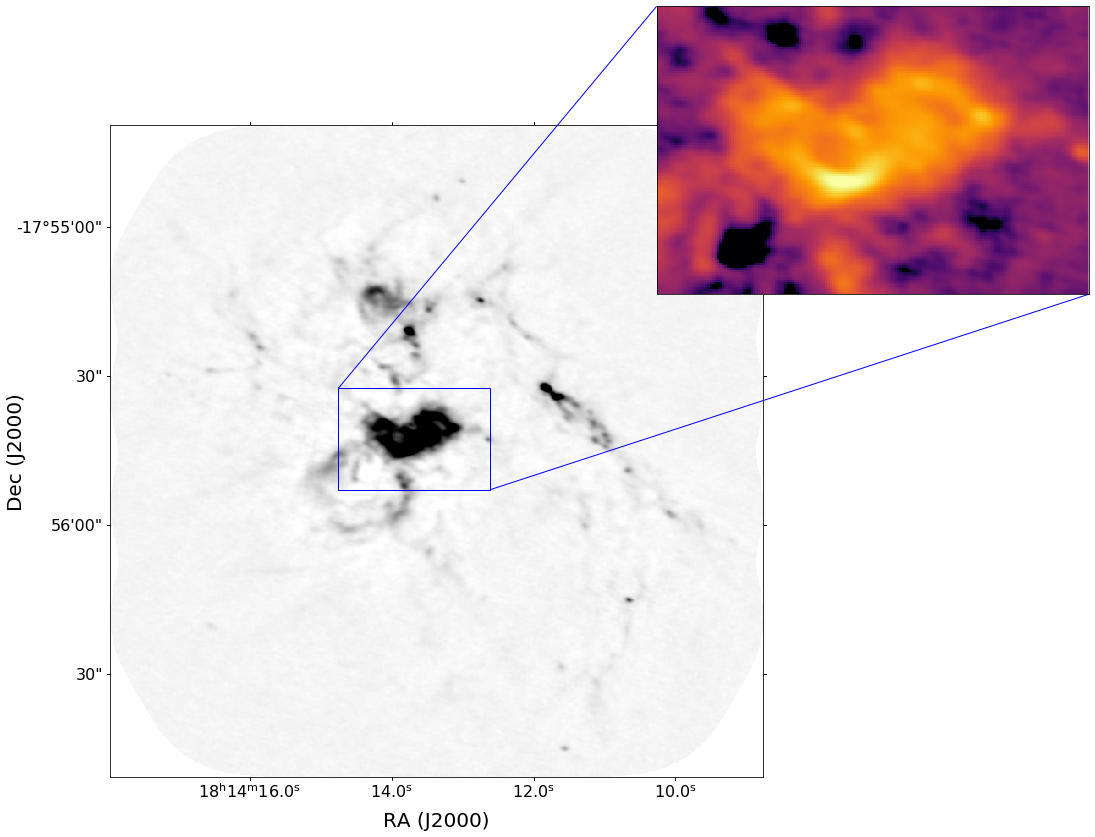

In [65]:
zoom_parameters[('G12', 'B6')] = [{'xl':270, 'xr':450, 'yl':340, 'yu':460, 
                                    'inset_pars':{'loc': 1, 'width':6, 'height':5, 'bbox_to_anchor':(800, 220, 300, 700),},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.995, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   #{'xl':435, 'xr':650, 'yl':920, 'yu':1030, 
                                   # 'inset_pars':{'loc': 1, 'width':3, 'height':3, 'bbox_to_anchor':(450, 850, 100,100),},
                                   # 'mark_inset_pars':{'loc1':3, 'loc2':4,},
                                   # 'vis_pars':{'max_percent':99.95, 'min_percent': 0, 'stretch':'linear'}
                                   #},
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom('G12', zoom_parameters[('G12', 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))

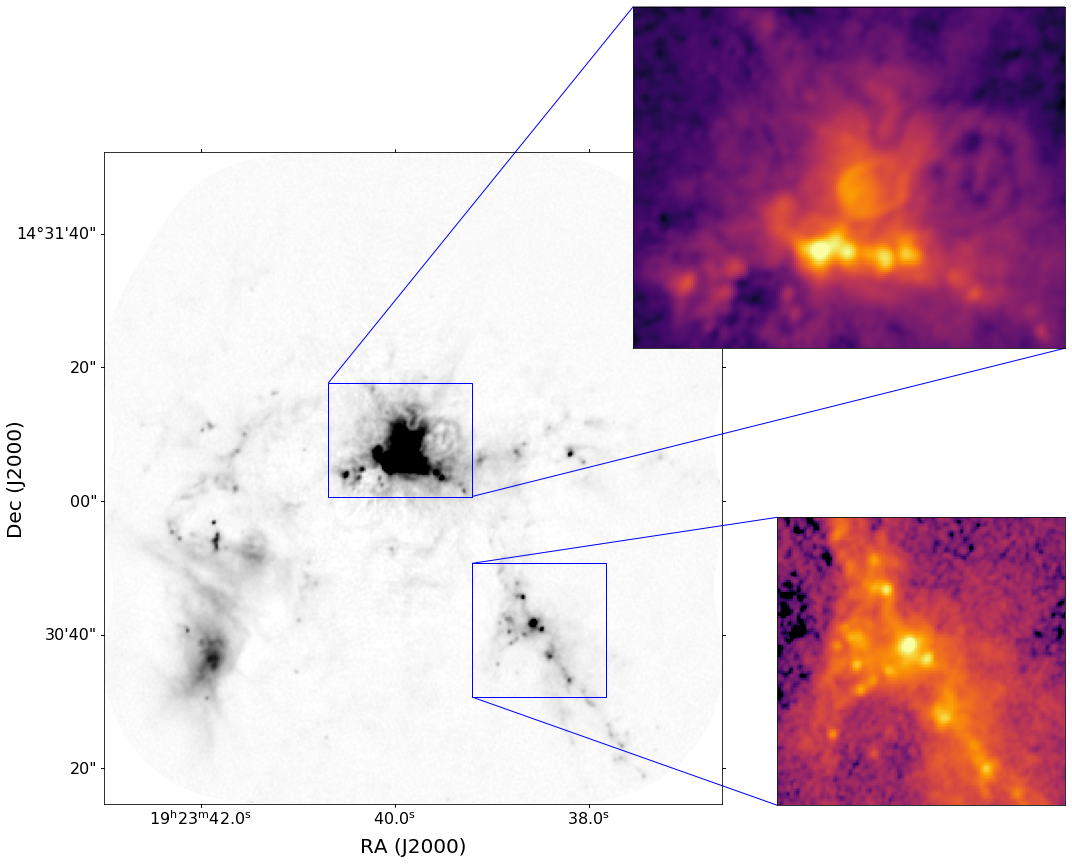

In [66]:
zoom_parameters[('W51IRS2', 'B6')] = [{'xl':335, 'xr':550, 'yl':460, 'yu':630, 
                                    'inset_pars':{'loc': 1, 'width':6, 'height':5, 'bbox_to_anchor':(800, 220, 300, 700),},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.995, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   {'xl':550, 'xr':750, 'yl':160, 'yu':360, 
                                    'inset_pars':{'loc': 1, 'width':4, 'height':4, 'bbox_to_anchor':(1000, 300, 100,100),},
                                    'mark_inset_pars':{'loc1':2, 'loc2':3,},
                                    'vis_pars':{'max_percent':99.7, 'min_percent': 1, 'stretch':'log'}
                                   },
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom('W51IRS2', zoom_parameters[('W51IRS2', 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))

In [67]:
prefixes.keys()

dict_keys(['G328', 'G333', 'G12', 'W51IRS2', 'G008', 'G327', 'G10', 'G337', 'G338', 'G351', 'G353', 'W43MM3', 'W43MM2', 'W51-E', 'W43MM1'])

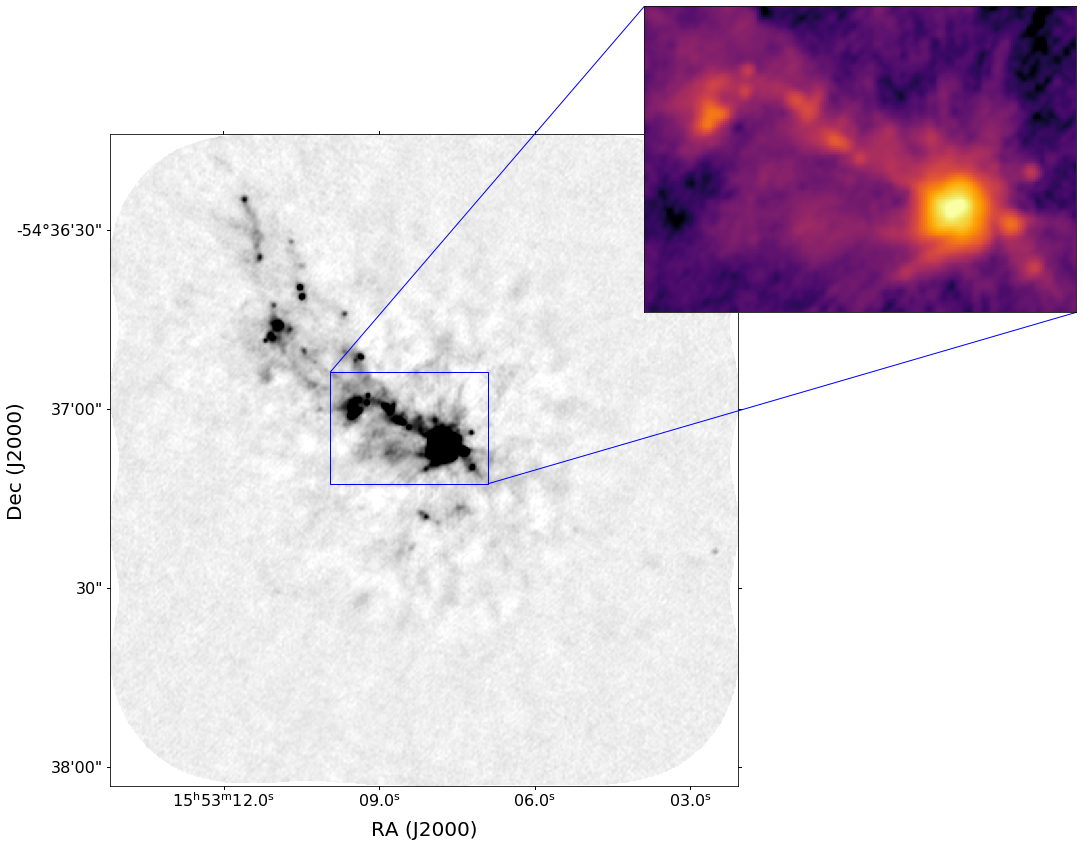

In [68]:
zoom_parameters[('G327', 'B6')] = [{'xl':335, 'xr':575, 'yl':460, 'yu':630, 
                                    'inset_pars':{'loc': 1, 'width':6, 'height':5, 'bbox_to_anchor':(800, 220, 300, 700),},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.995, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   #{'xl':550, 'xr':750, 'yl':160, 'yu':360, 
                                   # 'inset_pars':{'loc': 1, 'width':4, 'height':4, 'bbox_to_anchor':(1000, 300, 100,100),},
                                   # 'mark_inset_pars':{'loc1':2, 'loc2':3,},
                                   # 'vis_pars':{'max_percent':99.7, 'min_percent': 1, 'stretch':'log'}
                                   #},
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom('G327', zoom_parameters[('G327', 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))

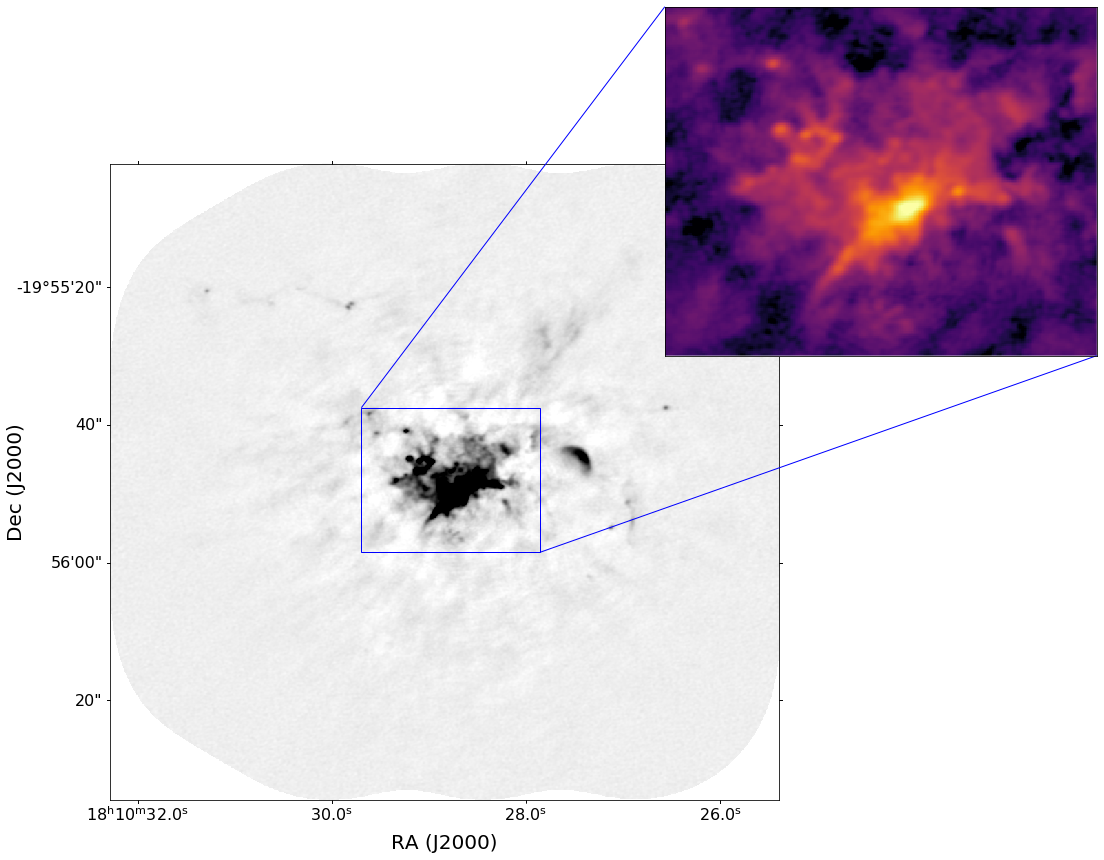

In [69]:
fieldid='G10'
zoom_parameters[(fieldid, 'B6')] = [{'xl':365, 'xr':625, 'yl':360, 'yu':570, 
                                    'inset_pars':{'loc': 1, 'width':6, 'height':5, 'bbox_to_anchor':(800, 220, 300, 700),},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.995, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   #{'xl':550, 'xr':750, 'yl':160, 'yu':360, 
                                   # 'inset_pars':{'loc': 1, 'width':4, 'height':4, 'bbox_to_anchor':(1000, 300, 100,100),},
                                   # 'mark_inset_pars':{'loc1':2, 'loc2':3,},
                                   # 'vis_pars':{'max_percent':99.7, 'min_percent': 1, 'stretch':'log'}
                                   #},
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom(fieldid, zoom_parameters[(fieldid, 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))

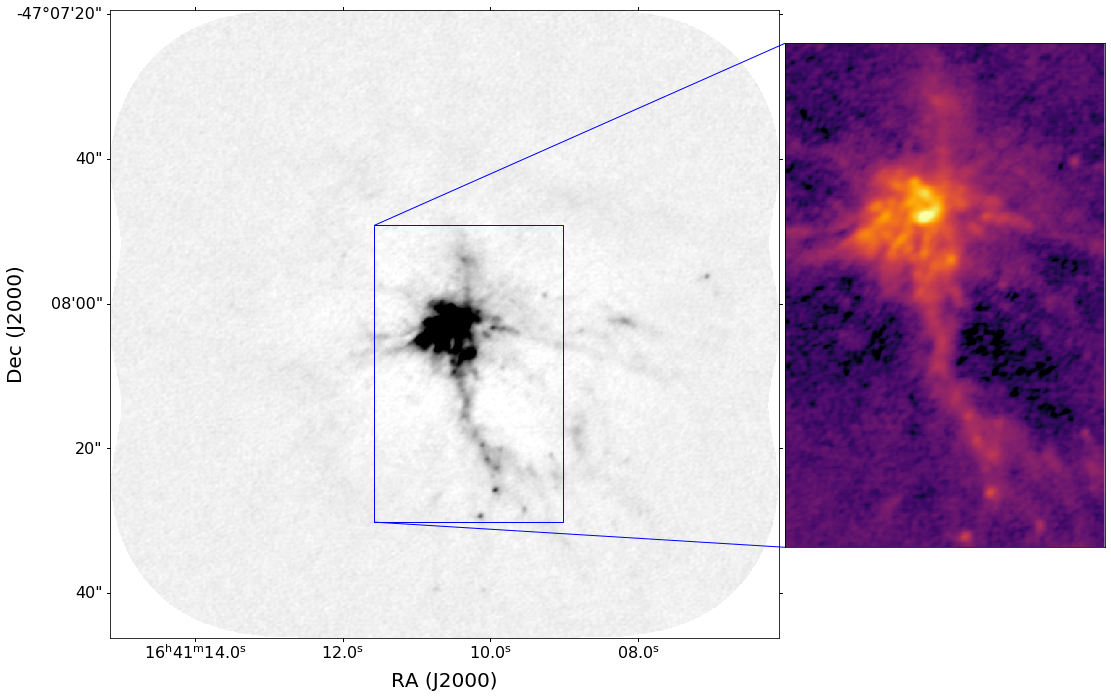

In [70]:
fieldid='G337'
zoom_parameters[(fieldid, 'B6')] = [{'xl':365, 'xr':625, 'yl':160, 'yu':570, 
                                    'inset_pars':{'loc': 1, 'width':7, 'height':7, 'bbox_to_anchor':(600, 20, 600, 700),},
                                    'mark_inset_pars':{'loc1':2, 'loc2':3,},
                                    'vis_pars':{'max_percent':99.995, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   #{'xl':550, 'xr':750, 'yl':160, 'yu':360, 
                                   # 'inset_pars':{'loc': 1, 'width':4, 'height':4, 'bbox_to_anchor':(1000, 300, 100,100),},
                                   # 'mark_inset_pars':{'loc1':2, 'loc2':3,},
                                   # 'vis_pars':{'max_percent':99.7, 'min_percent': 1, 'stretch':'log'}
                                   #},
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom(fieldid, zoom_parameters[(fieldid, 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))

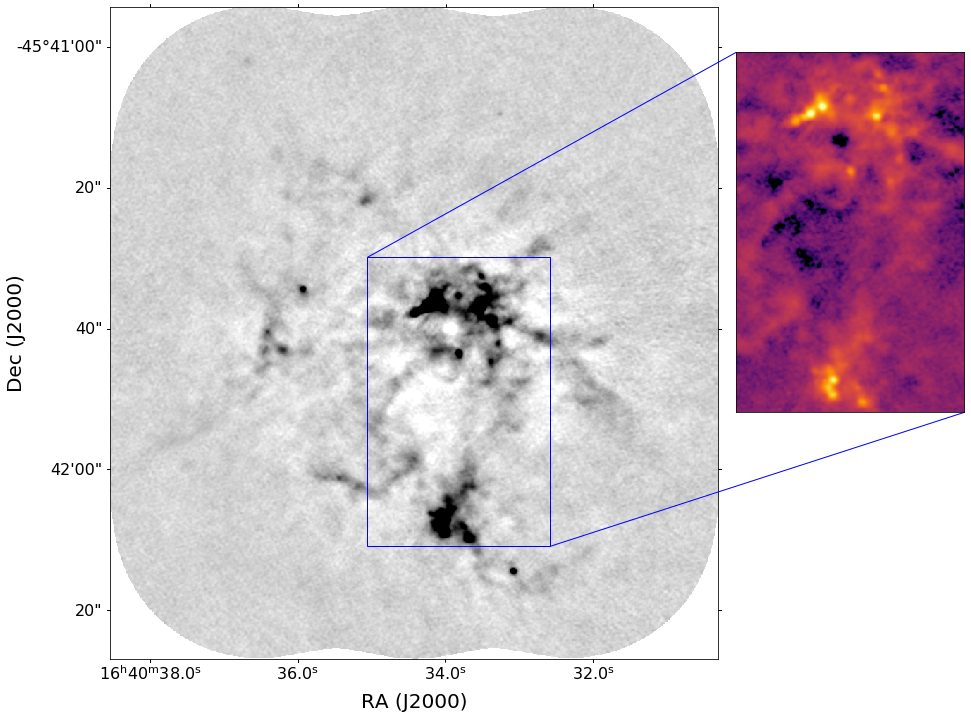

In [71]:
fieldid='G338'
zoom_parameters[(fieldid, 'B6')] = [{'xl':365, 'xr':625, 'yl':160, 'yu':570, 
                                    'inset_pars':{'loc': 1, 'width':6, 'height':5, 'bbox_to_anchor':(800, 20, 300, 700),},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.995, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   #{'xl':550, 'xr':750, 'yl':160, 'yu':360, 
                                   # 'inset_pars':{'loc': 1, 'width':4, 'height':4, 'bbox_to_anchor':(1000, 300, 100,100),},
                                   # 'mark_inset_pars':{'loc1':2, 'loc2':3,},
                                   # 'vis_pars':{'max_percent':99.7, 'min_percent': 1, 'stretch':'log'}
                                   #},
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom(fieldid, zoom_parameters[(fieldid, 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))

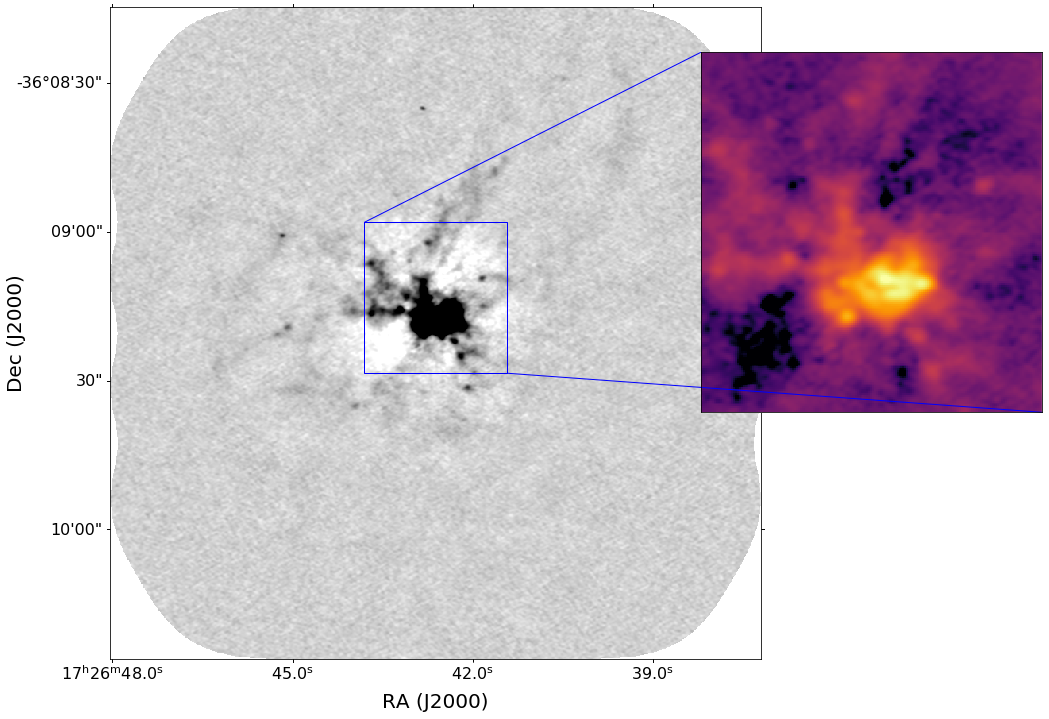

In [72]:
fieldid='G351'
zoom_parameters[(fieldid, 'B6')] = [{'xl':320, 'xr':500, 'yl':360, 'yu':550, 
                                    'inset_pars':{'loc': 1, 'width':6, 'height':5, 'bbox_to_anchor':(800, 20, 300, 700),},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.999, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   #{'xl':550, 'xr':750, 'yl':160, 'yu':360, 
                                   # 'inset_pars':{'loc': 1, 'width':4, 'height':4, 'bbox_to_anchor':(1000, 300, 100,100),},
                                   # 'mark_inset_pars':{'loc1':2, 'loc2':3,},
                                   # 'vis_pars':{'max_percent':99.7, 'min_percent': 1, 'stretch':'log'}
                                   #},
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom(fieldid, zoom_parameters[(fieldid, 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))

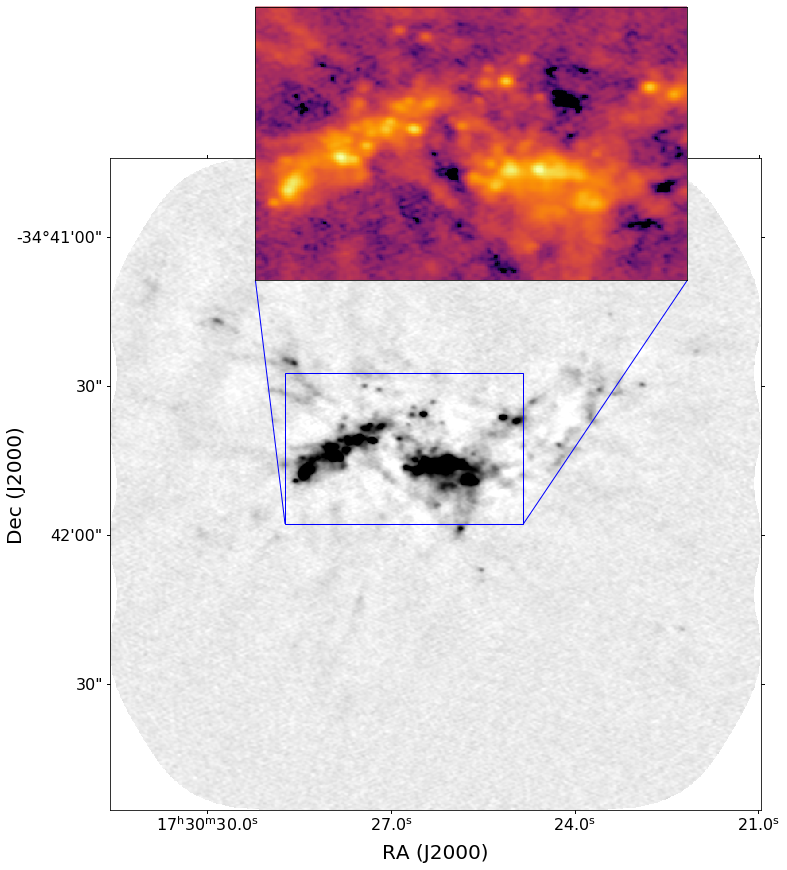

In [73]:
fieldid='G353'
zoom_parameters[(fieldid, 'B6')] = [{'xl':220, 'xr':520, 'yl':360, 'yu':550, 
                                    'inset_pars':{'loc': 1, 'width':6, 'height':5, 'bbox_to_anchor':(400, 260, 300, 700),},
                                    'mark_inset_pars':{'loc1':3, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.999, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   #{'xl':550, 'xr':750, 'yl':160, 'yu':360, 
                                   # 'inset_pars':{'loc': 1, 'width':4, 'height':4, 'bbox_to_anchor':(1000, 300, 100,100),},
                                   # 'mark_inset_pars':{'loc1':2, 'loc2':3,},
                                   # 'vis_pars':{'max_percent':99.7, 'min_percent': 1, 'stretch':'log'}
                                   #},
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom(fieldid, zoom_parameters[(fieldid, 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))

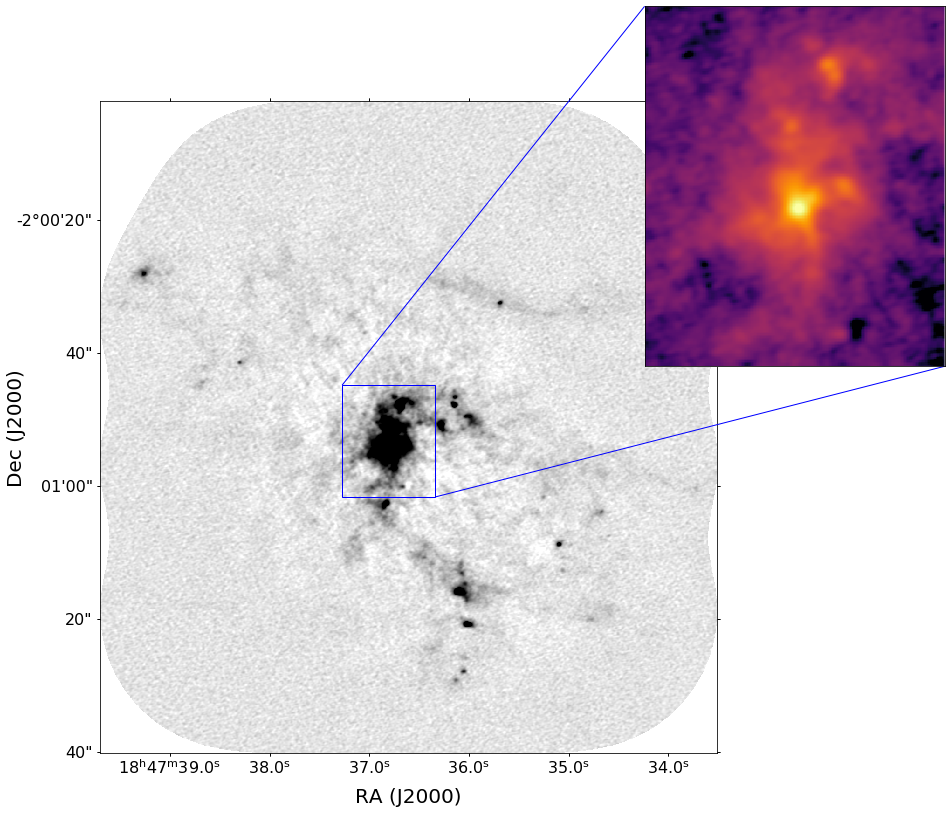

In [74]:
fieldid='W43MM2'
zoom_parameters[(fieldid, 'B6')] = [{'xl':520, 'xr':720, 'yl':550, 'yu':790, 
                                    'inset_pars':{'loc': 1, 'width':6, 'height':5, 'bbox_to_anchor':(750, 160, 300, 700),},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.999, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   #{'xl':550, 'xr':750, 'yl':160, 'yu':360, 
                                   # 'inset_pars':{'loc': 1, 'width':4, 'height':4, 'bbox_to_anchor':(1000, 300, 100,100),},
                                   # 'mark_inset_pars':{'loc1':2, 'loc2':3,},
                                   # 'vis_pars':{'max_percent':99.7, 'min_percent': 1, 'stretch':'log'}
                                   #},
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom(fieldid, zoom_parameters[(fieldid, 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))

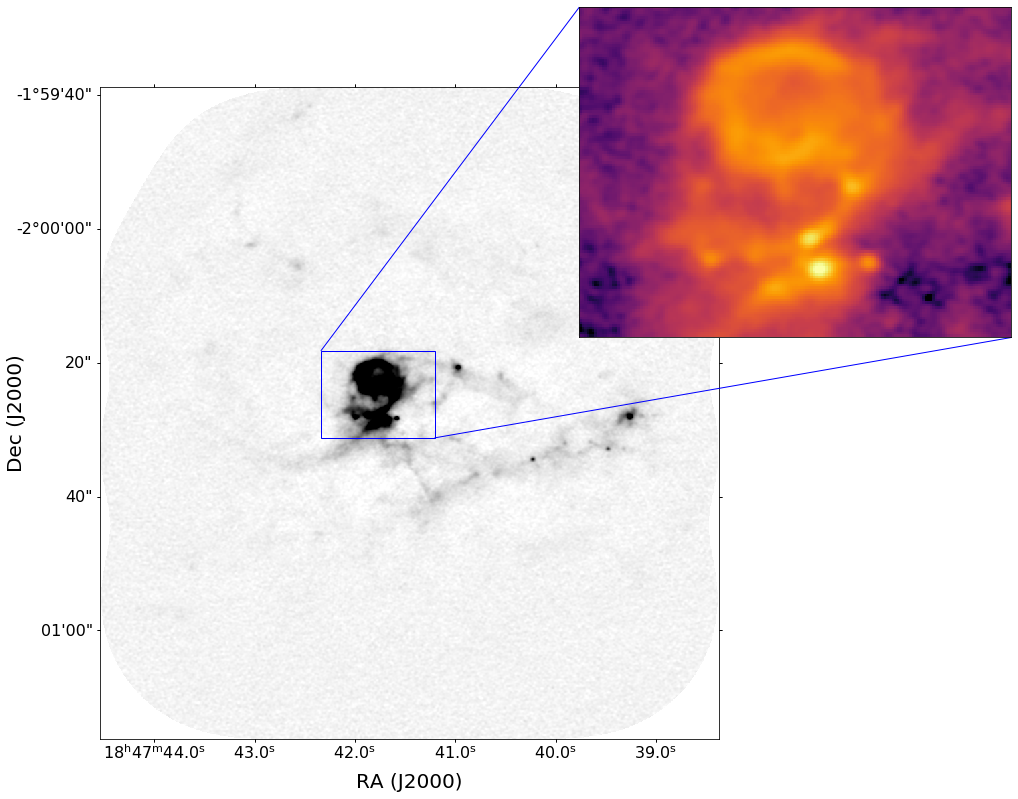

In [75]:
fieldid='W43MM3'
zoom_parameters[(fieldid, 'B6')] = [{'xl':330, 'xr':500, 'yl':450, 'yu':580, 
                                    'inset_pars':{'loc': 1, 'width':6, 'height':5, 'bbox_to_anchor':(750, 160, 300, 700),},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.999, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   #{'xl':550, 'xr':750, 'yl':160, 'yu':360, 
                                   # 'inset_pars':{'loc': 1, 'width':4, 'height':4, 'bbox_to_anchor':(1000, 300, 100,100),},
                                   # 'mark_inset_pars':{'loc1':2, 'loc2':3,},
                                   # 'vis_pars':{'max_percent':99.7, 'min_percent': 1, 'stretch':'log'}
                                   #},
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom(fieldid, zoom_parameters[(fieldid, 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))

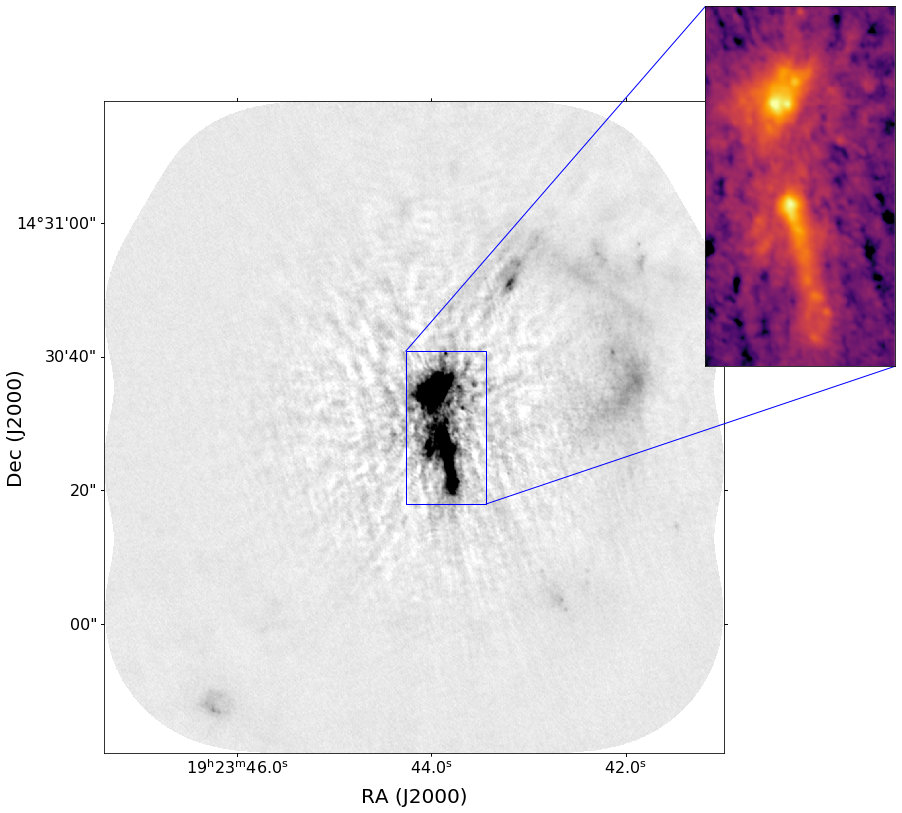

In [76]:
fieldid='W51-E'
zoom_parameters[(fieldid, 'B6')] = [{'xl':750, 'xr':950, 'yl':620, 'yu':1000, 
                                    'inset_pars':{'loc': 1, 'width':6, 'height':5, 'bbox_to_anchor':(750, 160, 300, 700),},
                                    'mark_inset_pars':{'loc1':2, 'loc2':4,},
                                    'vis_pars':{'max_percent':99.999, 'min_percent': 0.1, 'stretch':'log'}
                                   },
                                   #{'xl':550, 'xr':750, 'yl':160, 'yu':360, 
                                   # 'inset_pars':{'loc': 1, 'width':4, 'height':4, 'bbox_to_anchor':(1000, 300, 100,100),},
                                   # 'mark_inset_pars':{'loc1':2, 'loc2':3,},
                                   # 'vis_pars':{'max_percent':99.7, 'min_percent': 1, 'stretch':'log'}
                                   #},
                                  ]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    make_zoom(fieldid, zoom_parameters[(fieldid, 'B6')], band='B6',)# main_zoombox=(0,1600,0,1110))